# Import Data


In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install xlrd
%pip install scikit-learn
%pip install seaborn



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is a

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
import seaborn as sns  # สร้างกราฟ Boxplot
from scipy.stats import zscore

%matplotlib inline


In [24]:
# Define the directory to search for CSV and XLS files
directory = Path(r'./dataset/')
# Find all CSV and XLS files in the directory and its subdirectories
csv = list(directory.rglob('*.csv'))
xls = list(directory.rglob('*.xls'))

files = csv + xls


In [34]:
csv_files = list()
xls_files = list()
for index in range(len(files)):
    file = files[index]
    if "63" in file.name:
        if file.name.endswith(".csv"):
            csv_files.append(file)
        if file.name.endswith(".xls"):
            xls_files.append(file)

In [113]:
df1 = pd.concat([pd.read_csv(f, encoding='utf-8')
                 for f in csv_files])
df2 = pd.concat([pd.read_excel(f)
                 for f in xls_files])

df_concat = pd.concat([df1, df2], axis=0)


# Preprocessing - Data Cleaning


In [114]:
df_concat.shape

(418131, 11)

In [115]:
df_concat

,สถานี,วันที่-เวลา,pH,DO,EC,Temp,หมายเลข,Salinity,Turbidity,BOD,COD
0,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 00:00,-,2.300,464.700,28.3,NaN,NaN,NaN,NaN,NaN
1,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 00:30,-,2.300,463.100,28.3,NaN,NaN,NaN,NaN,NaN
2,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 01:00,-,2.300,464.200,28.3,NaN,NaN,NaN,NaN,NaN
3,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 01:30,-,2.300,466.700,28.3,NaN,NaN,NaN,NaN,NaN
4,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 02:00,-,2.300,468.200,28.2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10215,NaN,31 ก.ค.2563 21:30,8.1,4.9,238.2,30.7,222.0,0.1,,NaN,NaN
10216,NaN,31 ก.ค.2563 22:00,8.1,4.9,237.4,30.7,222.0,0.1,,NaN,NaN
10217,NaN,31 ก.ค.2563 22:30,8.1,4.9,236.7,30.7,222.0,0.1,,NaN,NaN
10218,NaN,31 ก.ค.2563 23:00,8.1,4.9,237.5,30.7,222.0,0.1,,NaN,NaN


In [116]:
df = df_concat.copy()

In [117]:
df.columns

Index(['สถานี ', 'วันที่-เวลา', 'pH', 'DO', 'EC', 'Temp', 'หมายเลข',
       'Salinity', 'Turbidity', 'BOD', 'COD'],
      dtype='object')

## missing value


In [118]:
# ตรวจสอบ missing value
df.isnull().sum()

สถานี          352596
วันที่-เวลา         0
pH                  0
DO                  0
EC                  0
Temp                0
หมายเลข         65535
Salinity       181163
Turbidity      249931
BOD            341389
COD            341389
dtype: int64

In [119]:
# ลบ column ที่เป็นภาษาไทย และ วันที่ทิ้งไป
df = df[['pH', 'DO', 'EC', 'Temp',
         'Salinity', 'Turbidity', 'BOD', 'COD']]

In [120]:
# นับจำนวนข้อมูลที่ไม่เป็น missing value ของ column  pH, DO, EC, Temp
df[['pH', 'DO', 'EC', 'Temp']].notnull().all(axis=1).sum()

418131

In [121]:
# ลบ column Salinity, Turbidity, BOD, COD ทิ้งไป เพราะว่ามีข้อมูลไม่ครบจากทุก dataset
df.drop(columns=['Salinity', 'Turbidity',
        'BOD', 'COD'], inplace=True)

In [122]:
# ตรวจสอบจำนวน missing value
df.isna().sum()

pH      0
DO      0
EC      0
Temp    0
dtype: int64

In [123]:
# ลบข้อมูลที่มี missing value ออกไป
df.dropna(inplace=True)

In [124]:
# ตรวจสอบจำนวน missing value
df.isnull().sum()

pH      0
DO      0
EC      0
Temp    0
dtype: int64

In [125]:
# แปลงตัวเลขที่เป็น string ให้เป็นตัวเลข และ เปลี่ยนตัวอักษรที่ไม่ถูกต้องให้เป็น NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [126]:
# ลบข้อมูลที่มี missing value ออกไป
df.dropna(inplace=True)

In [127]:
df.isnull().sum()

pH      0
DO      0
EC      0
Temp    0
dtype: int64

In [128]:
# เปลี่ยนชนิดข้อมูลให้เป็น float
df = df.astype(float)

# เปลี่ยนชนิดข้อมูลให้ pH เป็น int
df['pH'] = df['pH'].astype(int)

In [129]:

# df = df.iloc[:].apply(lambda x: x.round(2))

In [130]:
# reset index
df = df.reindex()

## Outlier data


In [131]:
# แสดงค่าสถิติพื้นฐาน
df.describe()

,pH,DO,EC,Temp
count,319952.000000,319952.000000,319952.000000,319952.000000
mean,5.823480,4.425241,1050.342042,29.592894
std,2.205455,2.438073,7180.436664,3.602120
min,-2.000000,0.000000,0.000000,-105.000000
25%,5.000000,2.400000,230.300000,28.048200
50%,6.000000,4.500000,316.500000,29.968500
75%,7.000000,6.400000,473.690000,31.600000
max,14.000000,19.350000,100000.000000,200.000000


<Axes: >

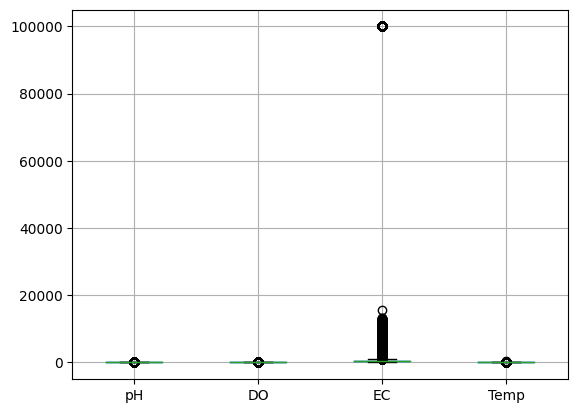

In [132]:
df.boxplot()

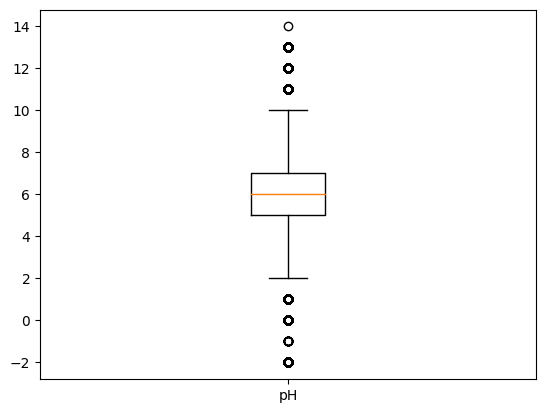

In [133]:
# แสดง box plot เพื่อตรวจสอบ Outlier Data
plt.boxplot(df['pH'], labels=['pH'])
plt.show()

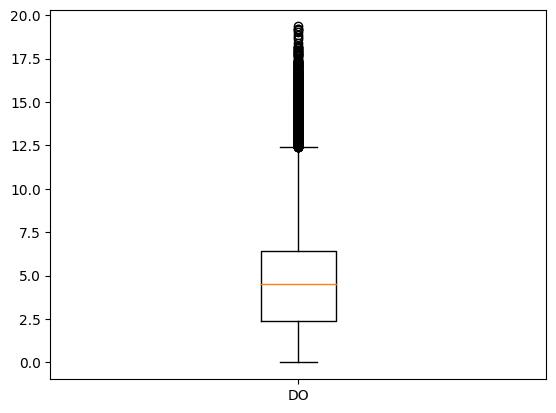

In [134]:
plt.boxplot(df['DO'], labels=['DO'])
plt.show()

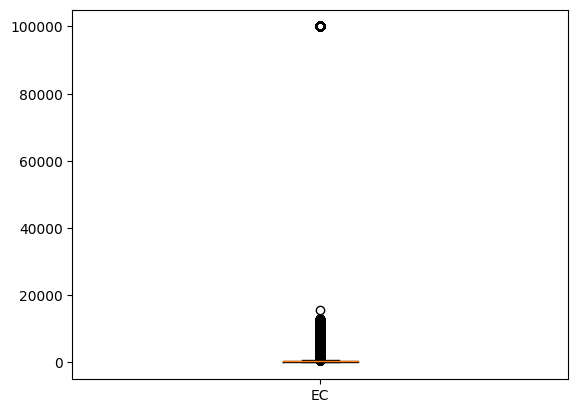

In [135]:
plt.boxplot(df['EC'], labels=['EC'])
plt.show()

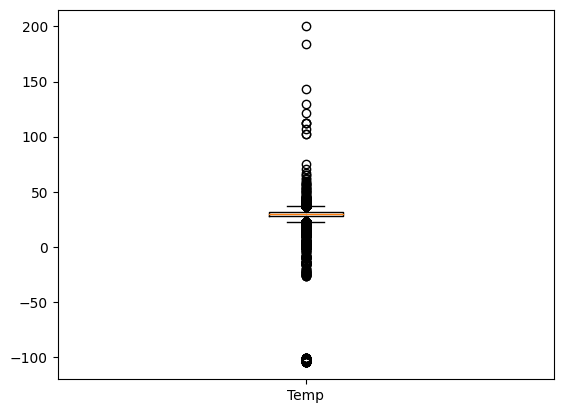

In [136]:
plt.boxplot(df['Temp'], labels=['Temp'])
plt.show()

จัดการ outlier data


In [137]:
def remove_outlier(df_in, col_name):
    q1 = np.quantile(df_in[col_name], 0.25)
    q3 = np.quantile(df_in[col_name], 0.75)
    iqr = q3-q1  # Interquartile range
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    print('Lower bound: ', fence_low)
    print('Upper bound: ', fence_high)
    df_out = df_in.loc[(df_in[col_name] > fence_low) &
                       (df_in[col_name] < fence_high)]
    return df_out

Lower bound:  2.0
Upper bound:  10.0


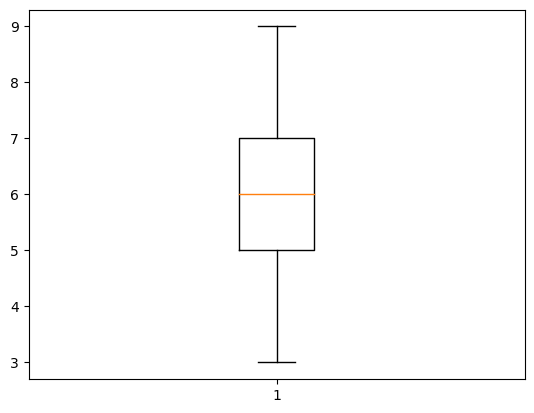

In [138]:
df_out = df.copy()
df_out = remove_outlier(df_out, 'pH')

plt.boxplot(df_out['pH'])
plt.show()

Lower bound:  -3.5561625000000006
Upper bound:  12.3269375
Lower bound:  -3.492600000000001
Upper bound:  12.221


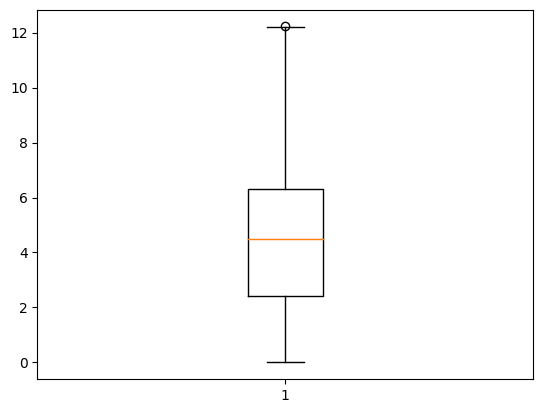

In [139]:

df_out = remove_outlier(df_out, 'DO')
df_out = remove_outlier(df_out, 'DO')
plt.boxplot(df_out['DO'])
plt.show()

Lower bound:  -100.25000000000006
Upper bound:  796.95
Lower bound:  -63.97
Upper bound:  721.582
Lower bound:  -58.30000000000001
Upper bound:  709.7
Lower bound:  -56.49999999999997
Upper bound:  705.9
Lower bound:  -56.107500000000016
Upper bound:  704.8645
Lower bound:  -55.950000000000045
Upper bound:  704.45
Lower bound:  -55.950000000000045
Upper bound:  704.45


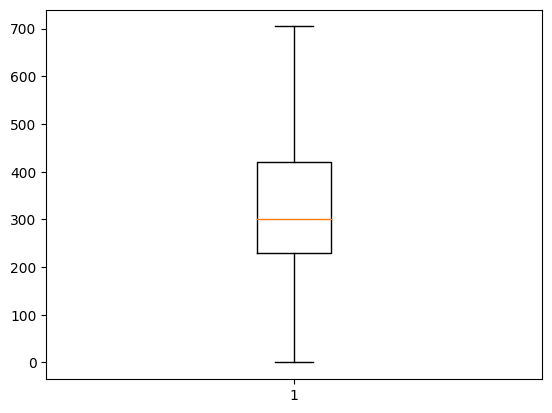

In [140]:

df_out = remove_outlier(df_out, 'EC')
df_out = remove_outlier(df_out, 'EC')
df_out = remove_outlier(df_out, 'EC')
df_out = remove_outlier(df_out, 'EC')
df_out = remove_outlier(df_out, 'EC')
df_out = remove_outlier(df_out, 'EC')
df_out = remove_outlier(df_out, 'EC')
# df_out = remove_outlier(df_out, 'EC')
# df_out = remove_outlier(df_out, 'EC')
plt.boxplot(df_out['EC'])
plt.show()

Lower bound:  22.299999999999997
Upper bound:  36.7
Lower bound:  22.800187499999993
Upper bound:  36.399887500000006
Lower bound:  23.049999999999997
Upper bound:  36.25


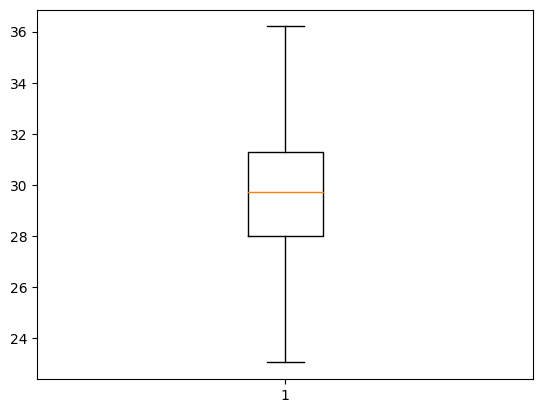

In [141]:

df_out = remove_outlier(df_out, 'Temp')
df_out = remove_outlier(df_out, 'Temp')
df_out = remove_outlier(df_out, 'Temp')
# df_out = remove_outlier(df_out, 'Temp')
# df_out = remove_outlier(df_out, 'Temp')
plt.boxplot(df_out['Temp'])
plt.show()

## duplicate data


In [142]:
print('จำนวน Duplicate Data df:', df.duplicated().sum())

จำนวน Duplicate Data df: 46043


In [143]:
# ลบ Duplicate Data
df = df.drop_duplicates()

In [144]:
df_split_copy = df.copy()

## แบ่งชุดข้อมูล


In [145]:
# seed สุ่มข้อมูล
seed = 5712
# แบ่งชุดข้อมูลออกเป็น test
df_split, df_test = train_test_split(
    df_split_copy, test_size=0.0001, random_state=seed)

# บ่งชุดข้อมูลออกเป็น  validation
df_split, df_valid = train_test_split(
    df_split, test_size=0.0001, random_state=seed)

# บ่งชุดข้อมูลออกเป็น  training
df_split, df_train = train_test_split(
    df_split, test_size=0.01, random_state=seed)

In [146]:
# จำนวนชุดข้อมูล
print('จำนวนชุดข้อมูลทั้งหมด :', len(df))
print('จำนวนชุดข้อมูล training :', len(df_train))
print('จำนวนชุดข้อมูล validation :', len(df_valid))
print('จำนวนชุดข้อมูล test :', len(df_test))

จำนวนชุดข้อมูลทั้งหมด : 273909
จำนวนชุดข้อมูล training : 2739
จำนวนชุดข้อมูล validation : 28
จำนวนชุดข้อมูล test : 28


## Data Transformation: Normalization


In [147]:
def minmaxNorm(Data, _min, _max):
    Data_Norm = (Data - _min)/(_max - _min)
    return Data_Norm


def min4norm(Data):
    _min = Data.min(axis=0, keepdims=True)
    return _min


def max4norm(Data):
    _max = Data.max(axis=0, keepdims=True)
    return _max

# KNN


### วัดระยะห่างระหว่างข้อมูลแต่ละตัวใน Validation Set กับข้อมูลทุกตัวใน Training Set


In [148]:
def KNN_find_distance(X_Train, x_valid):
    distance2 = ((X_Train - x_valid)**2).sum(axis=1)
    distance = np.sqrt(distance2)
    return distance

In [149]:
def KNN_find_distance_each_data(X_Train, X_Valid):
    all_distance = []
    for x_valid in X_Valid:
        distance = KNN_find_distance(X_Train, x_valid)
        all_distance.append(distance)
    return all_distance

### เรียงลำดับ Target ตามระยะห่าง


In [150]:
def KNN_sort_target_by_distance(Y_Train, distance):
    sorted_target = Y_Train[distance.argsort()]
    return sorted_target

In [151]:
def KNN_find_sorted_target_each_data(Y_Train, all_distance):
    all_sorted_target = []
    for distance in all_distance:
        sorted_target = KNN_sort_target_by_distance(Y_Train, distance)
        all_sorted_target.append(sorted_target)
    return all_sorted_target

### หาผลลัพธ์จากเพื่อนบ้านที่ใกล้ที่สุด K ตัว


#### KNN-C


In [152]:
def KNNC_find_class(sorted_target, K):
    unique, count_unique = np.unique(sorted_target[:K, :], return_counts=True)
    _class = unique[count_unique.argmax()]
    return _class

In [153]:
def KNNC_find_class_each_data(all_sorted_target, K):
    all_class = []
    for sorted_target in all_sorted_target:
        _class = KNNC_find_class(sorted_target, K)
        all_class.append(_class)
    all_class = np.array(all_class).reshape(-1, 1)
    return all_class

### หา error ของ K แต่ละค่า และ หา K ที่ทำให้ error บน Validation Set ต่ำที่สุด


#### KNN-C


In [154]:
def find_error_classification(Y, Yhat):
    N = Y.shape[0]
    error = (100/N)*(Y != Yhat).sum()
    return error

In [155]:
def KNNC_find_error_each_K(Y_Valid, all_sorted_target, min_K, max_K):
    K_list = [K for K in range(min_K, max_K + 1)]
    error_list = []
    for K in K_list:
        K_all_class = KNNC_find_class_each_data(all_sorted_target, K)
        K_error = find_error_classification(Y_Valid, K_all_class)
        error_list.append(K_error)
    return K_list, error_list

### เรียนรู้


In [156]:
def KNN_find_best_K(K_list, error_list):
    K_list = np.array(K_list)
    error_list = np.array(error_list)
    plt.plot(K_list, error_list)
    plt.xlabel('K')
    plt.ylabel('Error')
    sorted_K = K_list[error_list.argsort()]
    error_list.sort()
    best_K = sorted_K[0]
    L = len(K_list)
    # for l in range(L):
    # print('K :', sorted_K[l], ', error :', error_list[l])
    return best_K

#### KNN-C


In [157]:
def KNNC_fit(X_Train, Y_Train, X_Valid, Y_Valid, min_K, max_K):
    _min = min4norm(X_Train)
    _max = max4norm(X_Train)
    X_Train_Norm = minmaxNorm(X_Train, _min, _max)
    X_Valid_Norm = minmaxNorm(X_Valid, _min, _max)
    all_distance = KNN_find_distance_each_data(X_Train_Norm, X_Valid_Norm)
    all_sorted_target = KNN_find_sorted_target_each_data(Y_Train, all_distance)
    K_list, error_list = KNNC_find_error_each_K(
        Y_Valid, all_sorted_target, min_K, max_K)
    best_K = KNN_find_best_K(K_list, error_list)
    return best_K

### พยากรณ์


#### KNN-C


In [158]:
def KNNC_predict(X_Train, Y_Train, X_Test, best_K):
    _min = min4norm(X_Train)
    _max = max4norm(X_Train)
    X_Train_Norm = minmaxNorm(X_Train, _min, _max)
    X_Test_Norm = minmaxNorm(X_Test, _min, _max)
    all_distance = KNN_find_distance_each_data(X_Train, X_Test)
    all_sorted_target = KNN_find_sorted_target_each_data(Y_Train, all_distance)
    Yhat_Test = KNNC_find_class_each_data(all_sorted_target, best_K)
    return Yhat_Test

In [159]:
DataMatrix1 = df_train.values[:, :]
DataMatrix2 = df_valid.values[:, :]
DataMatrix3 = df_test.values

D = 1
X_train = DataMatrix1[:, D:]
X_train = np.array(X_train, dtype=np.float32)

X_valid = DataMatrix2[:, D:]
X_valid = np.array(X_valid, dtype=np.float32)

X_test = DataMatrix3[:, D:]
X_test = np.array(X_test, dtype=np.float32)

Y_train = DataMatrix1[:, :D]
Y_valid = DataMatrix2[:, :D]
Y_test = DataMatrix3[:, :D]

best_K คือ  39


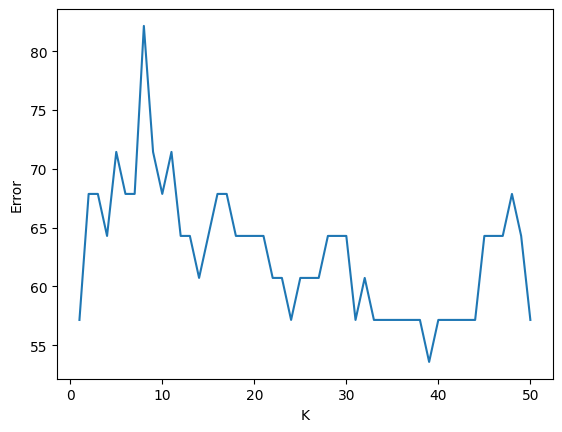

In [160]:
best_K = KNNC_fit(X_train, Y_train, X_valid, Y_valid, 1, 50)
print('best_K คือ ', best_K)

#### Make Prediction


In [161]:
Yhat_Test = KNNC_predict(X_train, Y_train, X_test, best_K)

In [162]:
error_Test = find_error_classification(Y_test, Yhat_Test)

In [163]:
print("มีค่า error เท่ากับ ", error_Test)

มีค่า error เท่ากับ  71.42857142857143


In [164]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Yhat_Test)

print(f"KNNC Accuracy: {accuracy}")

KNNC Accuracy: 0.2857142857142857


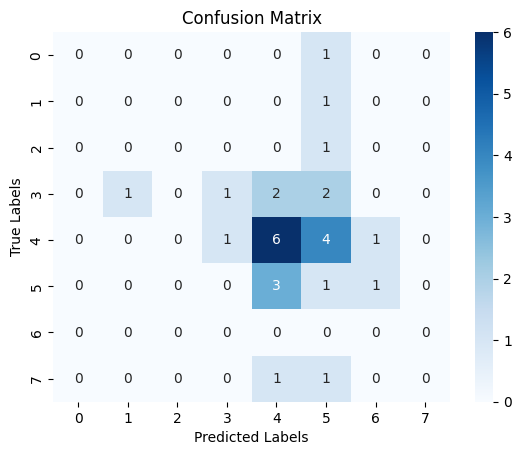

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# คำนวณ Confusion Matrix
cm = confusion_matrix(Y_test, Yhat_Test)

# แสดงผล Confusion Matrix ด้วย Heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Naive bayes


In [166]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [167]:
X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, :1]
X_valid = df_valid.iloc[:, 1:]
Y_valid = df_valid.iloc[:, :1]
X_test = df_test.iloc[:, 1:]
Y_test = df_test.iloc[:, :1]

In [168]:
# สร้างโมเดล Naive Bayes
model = GaussianNB()

# ฝึกโมเดลด้วยชุด Train
model.fit(X_train,  Y_train.values.ravel())

# ใช้โมเดลที่ฝึกแล้วทำนายคลาสของชุด test

Y_pred = model.predict(X_test)

## Evaluating Model Naive bayes


In [169]:
# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Naive Bayes Accuracy: {accuracy}")

Naive Bayes Accuracy: 0.2857142857142857


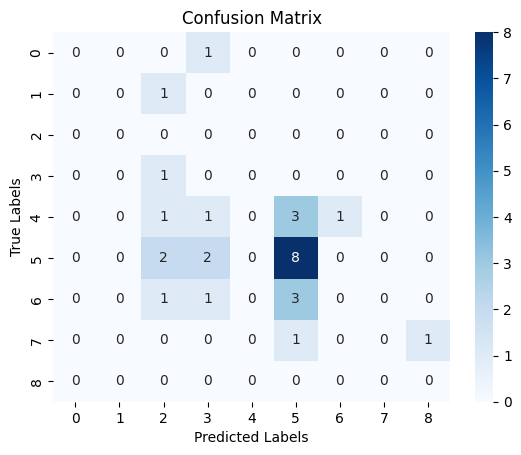

In [170]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# แสดงผล Confusion Matrix ด้วย Heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Decision Tree


In [171]:
from sklearn.tree import DecisionTreeClassifier


# แยก features (X) และ target (Y) จาก df_train
X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, :1]['pH']

X_valid = df_valid.iloc[:, 1:]
Y_valid = df_valid.iloc[:, :1]

X_test = df_test.iloc[:, 1:]
Y_test = df_test.iloc[:, :1]

# สร้างโมเดล Decision Tree
model = DecisionTreeClassifier()

# ฝึกโมเดลด้วยชุด Train
model.fit(X_train, Y_train)

# ใช้โมเดลที่ฝึกแล้วทำนายคลาสของชุด Validation

Y_pred = model.predict(X_test)

# Evaluating Model Decision Tree


In [172]:
# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(Y_test, Y_pred)

# แสดงผลลัพธ์
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.39285714285714285


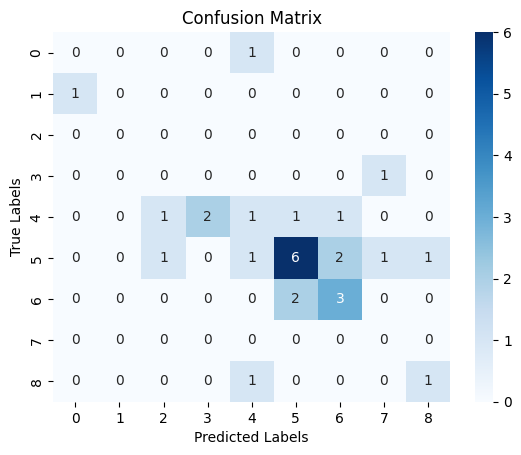

In [173]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# แสดงผล Confusion Matrix ด้วย Heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()